In [1]:
!pip install tensorflow


  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=e57055a775a34834e2074b0c65ffef4b053c4412f52b3cb4257113fa796e95b1
  Stored in directory: c:\users\g v swetha\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=e2ac92847738f6b8043afe6e69538c12ae14372d5ec821bf45c2796316e017a3
  Stored in directory: c:\users\g v swetha\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
Successfully built termcolor wrapt
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Attempting uninstall: wheel
    Found existing installation: wheel 0.34.2
    Uninstalling wheel-0.34.2:
      Successfully uninstalled wheel-0.34.2
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling 

In [31]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from keras.models import Sequential

import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [14]:
import os 
os.environ["KERAS_BACKEND"] = "tensorflow" 
# tensorflow 
import tensorflow 
print('tensorflow: %s' % tensorflow.__version__) 
# keras 
import keras 
print('keras: %s' % keras.__version__) 

tensorflow: 2.5.0
keras: 2.5.0


In [17]:
df = pd.read_csv('C:\\Users\\G V Swetha\\Desktop\\diabetes.csv') 
 
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all" 
 
# Investigate Data 
type(df) 
df.size 
df.shape 
df.head() 
df.tail() 
df.info()

pandas.core.frame.DataFrame

6912

(768, 9)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,diabetic
1,1,85,66,29,0,26.6,0.351,31,No
2,8,183,64,0,0,23.3,0.672,32,diabetic
3,1,89,66,23,94,28.1,0.167,21,No
4,0,137,40,35,168,43.1,2.288,33,diabetic


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,No
764,2,122,70,27,0,36.8,0.340,27,No
765,5,121,72,23,112,26.2,0.245,30,No
766,1,126,60,0,0,30.1,0.349,47,diabetic
767,1,93,70,31,0,30.4,0.315,23,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [11]:
print ('Overall data summary') 
df.describe() 
 
print ('Counts of Labels') 
df.groupby("Outcome").size() 
 


Overall data summary


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Counts of Labels


Outcome
No          500
diabetic    268
dtype: int64

In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [13]:
df.groupby("Outcome").size()

Outcome
No          500
diabetic    268
dtype: int64

In [19]:
for x in df.columns:
    if df[x].dtype == "object":
        df[x]=pd.Categorical(df[x]).codes

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int8   
dtypes: float64(2), int64(6), int8(1)
memory usage: 48.9 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11773a375b0>)

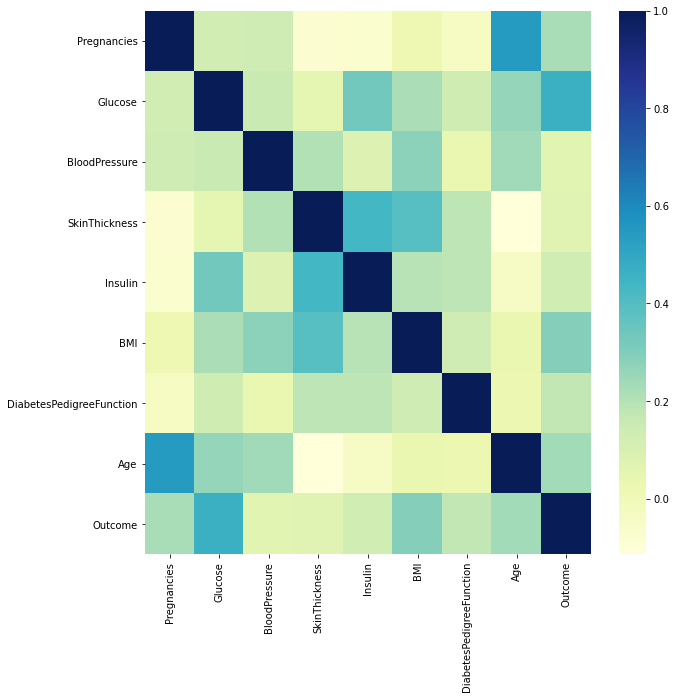

In [27]:
x = df.corr() 
x 
plt.subplots(figsize=(10,10)) 
sns.heatmap(x,cmap="YlGnBu") 
plt.show()

In [63]:
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation, Embedding, LSTM, Dropout, advanced_activations 
Y = df.iloc[:,8] 
X= df.iloc[:,0:8] 
std = StandardScaler() 
X_Features= std.fit_transform(X) 
# Create train and test data 75% and 25% split 
train_x, test_x, train_y, test_y = train_test_split(X_Features, Y, test_size=0.25, random_state=1) 
train_x.shape 
test_x.shape 
train_y.shape 
test_y.shape 
type(train_x) 
 
(576, 8) 
(192, 8) 
(576,) 
(192,) 
#numpy.ndarray 
# Build Deep Learning Model 
model = Sequential() 
model.add(Dense(512, input_dim =8)) 
model.add(Activation('relu')) 
model.add(Dropout(0.2)) 
model.add(Dense(256)) 
model.add(Activation('relu')) 
model.add(Dropout(0.2)) 
model.add(Dense(128)) 
model.add(Activation('relu')) 
model.add(Dropout(0.2)) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.2)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) 
#model.compile(loss='mean_squared_error',optimizer='sgd',metrics=['accuracy']) 
#model.compile(loss='binary_crossentropy',optimizer='adagrad',metrics=['accuracy']) 
 
train_x = np.array(train_x) 
train_y = np.array(train_y) 
# Fit the model 
#model.fit(train_x,train_y, epochs=10, batch_size=64)
model.fit(train_x,train_y, epochs=10, batch_size=64,callbacks=[], validation_split=0.0, validation_data=None)

(576, 8)

(192, 8)

(576,)

(192,)

numpy.ndarray

(576, 8)

(192, 8)

(576,)

(192,)

Epoch 1/10
9/9 [==============================] - 2s 3ms/step - loss: 0.6508 - accuracy: 0.6697
Epoch 2/10
9/9 [==============================] - 0s 4ms/step - loss: 0.5157 - accuracy: 0.7499
Epoch 3/10
9/9 [==============================] - 0s 4ms/step - loss: 0.4799 - accuracy: 0.7608
Epoch 4/10
9/9 [==============================] - 0s 3ms/step - loss: 0.4733 - accuracy: 0.7768
Epoch 5/10
9/9 [==============================] - 0s 4ms/step - loss: 0.4424 - accuracy: 0.7787
Epoch 6/10
9/9 [==============================] - 0s 4ms/step - loss: 0.4481 - accuracy: 0.7772
Epoch 7/10
9/9 [==============================] - 0s 4ms/step - loss: 0.4268 - accuracy: 0.8015
Epoch 8/10
9/9 [==============================] - 0s 4ms/step - loss: 0.4547 - accuracy: 0.7722
Epoch 9/10
9/9 [==============================] - 0s 5ms/step - loss: 0.4558 - accuracy: 0.7689
Epoch 10/10
9/9 [==============================] - 0s 4ms/step - loss: 0.4118 - accuracy: 0.8187


In [61]:
scores = model.evaluate(test_x, test_y) 
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 
 
 

 
classes = model.predict_classes(test_x, batch_size=20, verbose=0) 
print (classes.size) 
print('Positive Cases in Test Data:', test_y[test_y == 1].shape[0]) 
print('Neagtive Cases in Test Data:', test_y[test_y == 0].shape[0]) 
print() 
print() 
print ('Accuracy Score') 
print (metrics.accuracy_score(test_y, classes)) 
print() 
print() 
auc = metrics.roc_auc_score(test_y,classes) 
print ('AUC') 
print (auc) 
print() 
print() 
print ('Precision/Recall Metrics') 
print (metrics.classification_report(test_y,classes)) 

6/6 [==============================] - 0s 2ms/step - loss: 0.4500 - accuracy: 0.8073

accuracy: 80.73%
192
Positive Cases in Test Data: 69
Neagtive Cases in Test Data: 123


Accuracy Score
0.8072916666666666


AUC
0.7891481088723931


Precision/Recall Metrics
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       123
           1       0.74      0.72      0.73        69

    accuracy                           0.81       192
   macro avg       0.79      0.79      0.79       192
weighted avg       0.81      0.81      0.81       192



C:\Users\G V Swetha\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
